In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\123\Downloads\mysql\price-history-1397-10-01-to-1399-10-01.ketram.xlsx", header=7, parse_dates=True)


In [2]:
df = df[['پایانی','تاریخ میلادی']]
df

,پایانی,تاریخ میلادی
0,38460,2020-12-21
1,36630,2020-12-20
2,34920,2020-12-19
3,34690,2020-12-16
4,36330,2020-12-15
...,...,...
478,1711,2018-12-26
479,1749,2018-12-25
480,1698,2018-12-24
481,1630,2018-12-23


In [3]:
df.set_index('تاریخ میلادی', inplace=True, drop=True)

In [4]:
df.sort_index(ascending=True, inplace=True)
df

,پایانی
تاریخ میلادی,
2018-12-22,1591
2018-12-23,1630
2018-12-24,1698
2018-12-25,1749
2018-12-26,1711
...,...
2020-12-15,36330
2020-12-16,34690
2020-12-19,34920


In [5]:
dg = df['2020-07-01':'2020-07-27']

In [6]:
dg.reset_index(inplace=True)
dg

,تاریخ میلادی,پایانی
0,2020-07-01,40000
1,2020-07-04,38270
2,2020-07-05,39090
3,2020-07-06,41040
4,2020-07-07,39820
5,2020-07-08,37920
6,2020-07-11,36060
7,2020-07-12,35640
8,2020-07-13,33880
9,2020-07-14,32310


In [7]:
l = {}
for i in range(len(dg.index)):
    if i<len(dg.index):
        for j in range(i+1, len(dg.index)):
            l[(i,j)]=(dg.iloc[j,1]-dg.iloc[i,1])
            
    

In [8]:
inj=[]
for i in dg.index:
    if i%2!=0:
        inj.append(i)
mt = len(inj) # The utmost number of consecutive trades

def get_key(n):
    h = set()
    for i in l.keys():
        h.add(i[n])
    return list(h)

In [9]:
vh=[]
for i in l.keys():
    vh.append([i])
def fgh(i):
    if i==1:
        return vh
    if i>1:
        wh=[]
        for t in fgh(i-1):
            for j in l.keys():
                if (t[-1][1]<j[0]):
                    wh.append([t[i] for i in range(i-1)]+[j])

    return wh

In [10]:
#fgh(10)

In [11]:
fih={}
for i in range(1,mt+1):
    cf=[]
    for j in fgh(i):
        bg=0
        for s in j:
            bg+=l[s]
        cf.append((j,bg))
    fih[i]=cf
    

In [12]:
#fih[4]

In [13]:
#l

In [14]:
kih={}
for i in range(1,mt+1):
    lst=[]
    for j in fih[i]:
        lst.append(j[1])
    for j in fih[i]:
        if j[1]==max(lst):
            kih[i]=[j[0],max(lst)]
    

In [15]:
kih

{1: [[(9, 13)], 6050],
 2: [[(1, 3), (9, 13)], 8820],
 3: [[(1, 3), (6, 7), (9, 13)], 8400],
 4: [[(1, 3), (6, 7), (9, 13), (17, 18)], 7850],
 5: [[(1, 3), (6, 7), (9, 13), (14, 15), (17, 18)], 7130],
 6: [[(1, 3), (6, 7), (9, 10), (11, 13), (14, 15), (17, 18)], 5470],
 7: [[(1, 3), (4, 5), (6, 7), (9, 10), (11, 13), (14, 15), (17, 18)], 3570],
 8: [[(0, 1), (2, 3), (4, 5), (6, 7), (9, 10), (11, 13), (14, 15), (17, 18)],
  1020],
 9: [[(0, 1),
   (2, 3),
   (4, 5),
   (6, 7),
   (8, 9),
   (10, 11),
   (12, 13),
   (14, 15),
   (17, 18)],
  -1880]}

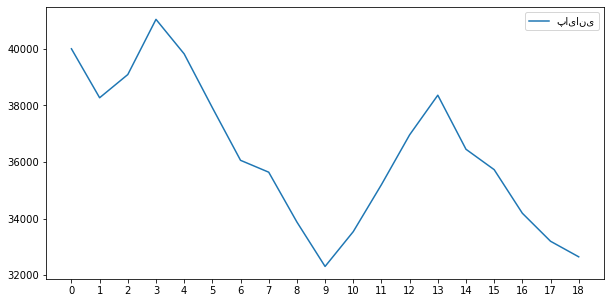

In [16]:
dg.plot(figsize=(10,5),xticks=dg.index)